In [ ]:
# ## data-question-3
# ### Earthquakes 
# - Nate Silver discusses the difficulty of predicting earthquakes in **The Signal and the Noise**, but are there factors that make an earthquake more likely? 
# - Are there factors that make an earthquake more deadly? 
# - Where would you live if you wanted to eliminate the risk of experiencing an earthquake? 
# - Where would you avoid living?

# Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using *beautifulsoup* and load it to a pandas dataframe. An introduction to the request and beautifulsoup libraries is provided in `TuringAward_soup.ipynb`.

# #### Data cleaning tasks include:
# 1. Replace empty strings with NaN
# 2. Remove the footnotes from the 'Other Source Deaths' column
# 3. Convert Magnitude to a numeric
# 4. Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
# 5. Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

# Feel free to add data after 9/23/2011, but understand that it is not required.
# Add any supplemental data you'd like in order to explore ideas related to earthquake occurrence and effects.


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS

In [ ]:
response = requests.get ('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [ ]:
result_text=response.text

In [ ]:
print(type(response))
print(type(result_text))

In [ ]:
soup = BS(result_text, 'html.parser')

In [ ]:
soup.title

In [ ]:
print(soup.prettify())

In [ ]:
table=soup.findAll('table',{'class':'sortable wikitable'})

In [ ]:
len(table)

In [ ]:
print(table)

In [ ]:
earthquakedf = pd.read_html(str(table))

In [ ]:
earthquakedf

In [ ]:
earthquakedf = earthquakedf[0]

In [ ]:
earthquakedf

In [ ]:
# earthquakedf.rename(columns=earthquakedf.iloc[1])

In [ ]:
earthquakedf.columns = earthquakedf.iloc[0]

In [ ]:
earthquakedf.reindex(earthquakedf.index.drop(0))

In [ ]:
earthquakedf.describe()

In [ ]:
earthquakedf['Other Source Deaths'].unique()

In [ ]:
earthquakedf[~earthquakedf['Other Source Deaths'].isna()]

In [ ]:
earthquakedf.loc[44, 'Other Source Deaths'] = 8000

In [ ]:
earthquakedf.loc[67, 'Other Source Deaths'] = 164

In [ ]:
earthquakedf.loc[100, 'Other Source Deaths'] = 1500

In [ ]:
earthquakedf.loc[959, 'Other Source Deaths'] = 33

In [ ]:
earthquakedf.loc[1079, 'Other Source Deaths'] = 45000 

In [ ]:
earthquakedf.loc[1083, 'Other Source Deaths'] = 2489

In [ ]:
# For any data that has two different estimates, I am averaging the estimates. 

In [ ]:
earthquakedf.loc[1207, 'Other Source Deaths'] = (26271+ 26000)/2

In [ ]:
earthquakedf.loc[1239, 'Other Source Deaths'] = (231000+283000+227898)/3

In [ ]:
earthquakedf.loc[1319, 'Other Source Deaths'] = 60

In [ ]:
earthquakedf.loc[1329, 'Other Source Deaths'] = 222517

In [ ]:
earthquakedf.loc[1330, 'Other Source Deaths'] = 521

In [ ]:
earthquakedf.loc[1336, 'Other Source Deaths'] = 15894

In [ ]:
earthquakedf.loc[1337, 'Other Source Deaths'] = 150

In [ ]:
earthquakedf.loc[1339, 'Other Source Deaths'] = 111

In [ ]:
earthquakedf.loc[1340, 'Other Source Deaths'] = 601

In [ ]:
earthquakedf['Other Source Deaths']

In [ ]:
earthquakedf['Other Source Deaths'].replace(regex=True,to_replace=r'\D',value=r'')

In [ ]:
earthquakedf['Other Source Deaths']

In [ ]:
earthquakedf

In [ ]:
earthquakedf['Magnitude Numeric'], earthquakedf['Magnitude Units'] = earthquakedf['Magnitude'].str.split(' ', 1).str

In [ ]:
earthquakedf

In [ ]:
earthquakedf=earthquakedf.drop(earthquakedf.index[0])

In [ ]:
earthquakedf.drop('Magnitude', axis=1)

In [ ]:
earthquakedf

In [ ]:
earthquakedf.columns.to_series().groupby(earthquakedf.dtypes).groups

In [ ]:
import numpy as np

In [ ]:
# 439 (just take what is before plus sign)

In [ ]:
earthquakedf['Other Source Deaths'].unique()

In [ ]:
earthquakedf['Other Source Deaths'].describe()

In [ ]:
earthquakedf['Magnitude Numeric'] = pd.to_numeric(earthquakedf['Magnitude Numeric'], errors='coerce')

In [ ]:
# earthquakedf['Magnitude Numeric'] = pd.to_numeric(earthquakedf['Magnitude Numeric'], errors='coerce')
earthquakedf['Other Source Deaths Numeric'] = pd.to_numeric(earthquakedf['Other Source Deaths'], errors = 'coerce')
earthquakedf['EM-DAT Total Deaths Numeric'] = pd.to_numeric(earthquakedf['EM-DAT Total Deaths'], errors = 'coerce')
earthquakedf['PDE Total Deaths Numeric'] = pd.to_numeric(earthquakedf['PDE Total Deaths'], errors = 'coerce')
earthquakedf['Utsu Total Deaths Numeric'] = pd.to_numeric(earthquakedf['Utsu Total Deaths'], errors = 'coerce')

In [ ]:
earthquakedf

In [ ]:
earthquakedf = earthquakedf.drop('Other Source Deaths', 1)

In [ ]:
earthquakedf = earthquakedf.drop('EM-DAT Total Deaths', 1)

In [ ]:
earthquakedf = earthquakedf.drop('PDE Total Deaths', 1)

In [ ]:
earthquakedf = earthquakedf.drop('Utsu Total Deaths', 1)

In [ ]:
earthquakedf

In [ ]:
earthquakedf['Max']=earthquakedf[['PDE Total Deaths Numeric','Utsu Total Deaths Numeric','EM-DAT Total Deaths Numeric', 'Other Source Deaths Numeric']].apply(np.max,axis=1)

In [96]:
earthquakedf

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max
1,1900-05-11 17:23,Japan,38.7000,141.1000,5.0,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.3000,43.1000,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0,140.0
3,1900-10-29 09:11,Venezuela,11.0000,-66.0000,0.0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.0000,100.1000,0.0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.4000,28.7000,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0,4.0
6,1901-08-09 09:23,Japan,40.5000,142.5000,35.0,7.2 Mw,T,NaN,7.2,Mw,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand,-43.0000,173.0000,0.0,6.8 Ms,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0,1.0
8,1902-01-30 14:01,Japan,40.5000,141.3000,35.0,6.9 Ms,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0,1.0
9,1902-02-13 09:39,Azerbaijan,40.7000,48.6000,15.0,6.9 Muk,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0,86.0
10,1902-03-09 07:46,Turkey,40.7000,33.6000,NaN,5.5 Muk,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0,4.0


In [ ]:
earthquakedf = earthquakedf.rename(index=str, columns={"Present-day country and link to Wikipedia article": "Country"})

In [ ]:
earthquakedf.info()

In [ ]:
# def getrid_ofunits(earthquakedf ['Magnitude']):
#     if earthquakedf ['Magnitude'].endswith(" MJMA"): s = s[:-5]
#     if earthquakedf ['Magnitude'].startswith(" Muk"): s = s[:-4]
#     if earthquakedf ['Magnitude'].endswith(" Mw"): s = s[:-3]
#     if earthquakedf ['Magnitude'].startswith(" Ms"): s = s[:-3]
#     if earthquakedf ['Magnitude'].endswith(" ML"): s = s[:-3]
#     return getrid_ofunits

In [ ]:
earthquakedf['Max'].mean()

In [ ]:
earthquakedf['Max'].count()

In [ ]:
earthquakedf['Max'].min()

In [ ]:
earthquakedf['Max'].max()

In [ ]:
earthquakedf['Max'].var()

In [ ]:
earthquakedf['Max'].std()

In [ ]:
earthquakedf['Max'].skew()

In [ ]:
earthquakedf.describe()

In [ ]:
earthquakedf.describe(include='all')

In [ ]:
earthquakedf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
earthquakedf['Lat'] = pd.to_numeric(earthquakedf['Lat'], errors = 'coerce')
earthquakedf['Long'] = pd.to_numeric(earthquakedf['Long'], errors = 'coerce')
earthquakedf['Depth (km)'] = pd.to_numeric(earthquakedf['Depth (km)'], errors = 'coerce')

In [ ]:
earthquakedf

In [ ]:
earthquakedf['Country'].str.replace(r" ?\([^)]+\)", "",regex=True)

In [ ]:
fix2=earthquakedf['Country'].str.partition('(')
earthquakedf['Country']=fix2.iloc[:,0]

In [ ]:
earthquakedf

In [ ]:
earthquakedf['Country'].unique()

In [ ]:
earthquakedf['Max'].sort_values(ascending = False)


In [ ]:
fix3=earthquakedf['Country'].str.partition(',')
earthquakedf['Country']=fix3.iloc[:,0]

In [ ]:
import seaborn as sns

Text(0.5,1,'Magnitude vs. Total Deaths')

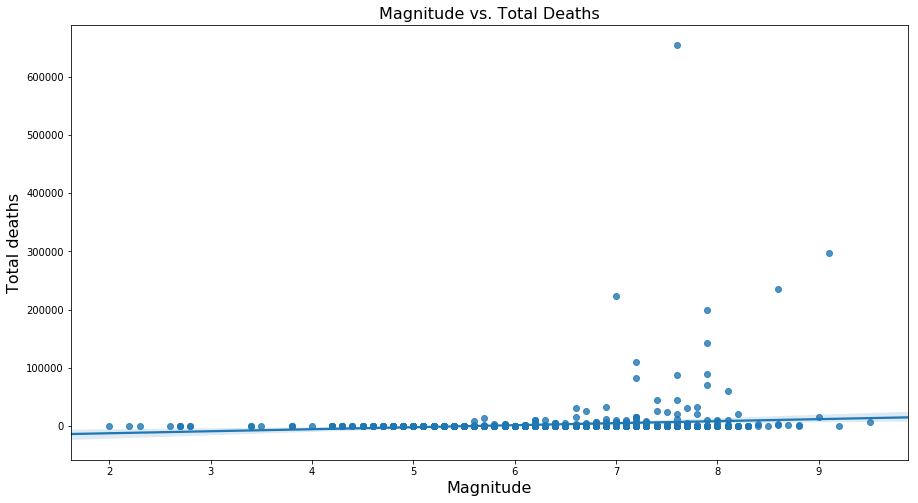

In [91]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Magnitude Numeric", y = "Max", data=earthquakedf)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Magnitude vs. Total Deaths", fontsize=16)

# From the above scatter plot, we can see that only earthquakes at a magnitude of a 7 or above are 'catostrophic,' where the total death count climbs above 100,000.

In [112]:
step = 2
to_bin = lambda x: np.floor(x / step) * step
earthquakedf["latbin"] = earthquakedf.Lat.map(to_bin)
earthquakedf["lonbin"] = earthquakedf.Long.map(to_bin)
groups = earthquakedf.groupby(("latbin", "lonbin"))

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """


In [113]:
earthquakedf

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max,latbin,lonbin
1,1900-05-11 17:23,Japan,38.7000,141.1000,5.0,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN,NaN,38.0,140.0
2,1900-07-12 06:25,Turkey,40.3000,43.1000,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0,140.0,40.0,42.0
3,1900-10-29 09:11,Venezuela,11.0000,-66.0000,0.0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN,NaN,10.0,-66.0
4,1901-02-15 00:00,China,26.0000,100.1000,0.0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN,NaN,26.0,100.0
5,1901-03-31 07:11,Bulgaria,43.4000,28.7000,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0,4.0,42.0,28.0
6,1901-08-09 09:23,Japan,40.5000,142.5000,35.0,7.2 Mw,T,NaN,7.2,Mw,NaN,NaN,NaN,NaN,NaN,40.0,142.0
7,1901-11-15 20:15,New Zealand,-43.0000,173.0000,0.0,6.8 Ms,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0,1.0,-44.0,172.0
8,1902-01-30 14:01,Japan,40.5000,141.3000,35.0,6.9 Ms,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0,1.0,40.0,140.0
9,1902-02-13 09:39,Azerbaijan,40.7000,48.6000,15.0,6.9 Muk,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0,86.0,40.0,48.0
10,1902-03-09 07:46,Turkey,40.7000,33.6000,NaN,5.5 Muk,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0,4.0,40.0,32.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B40448EB70>]],
      dtype=object)

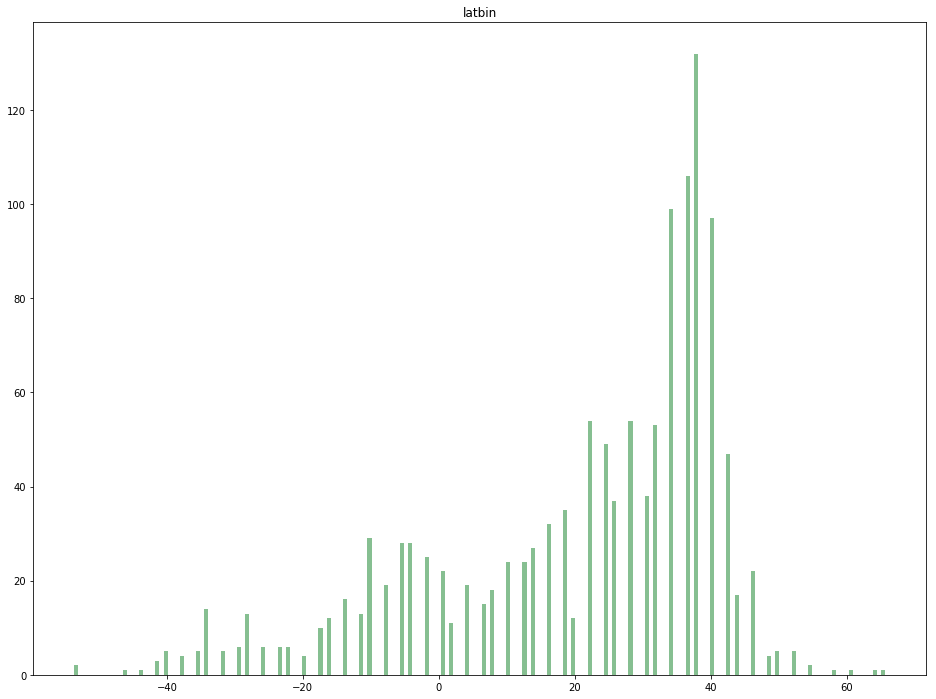

In [114]:
earthquakedf.hist(column='latbin', bins=100, grid=False, figsize=(16,12), color='#86bf91', zorder=2, rwidth=0.5,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B405BB94E0>]],
      dtype=object)

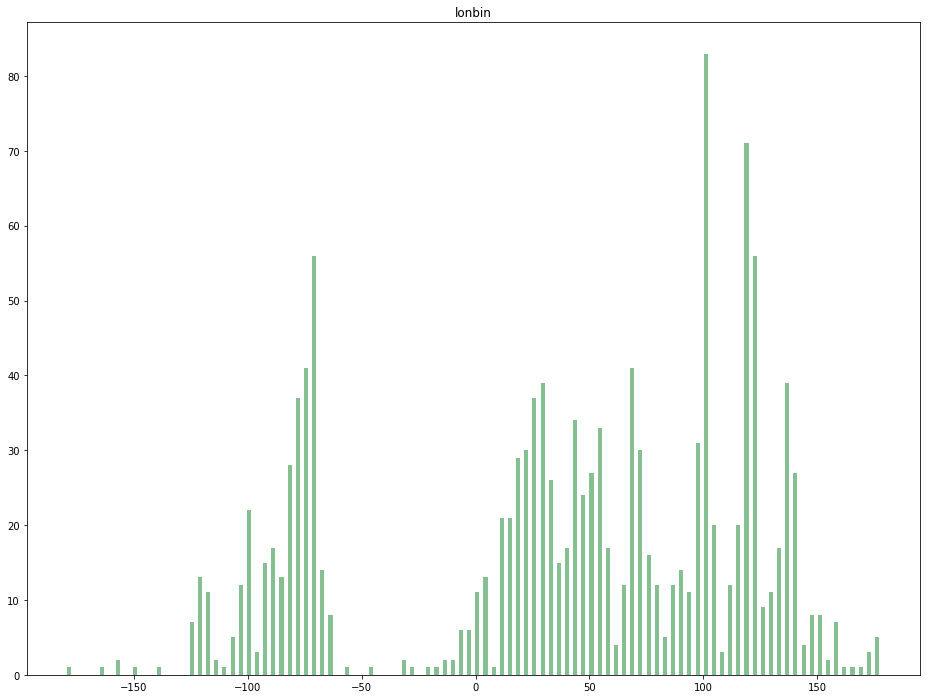

In [116]:
earthquakedf.hist(column='lonbin', bins=100, grid=False, figsize=(16,12), color='#86bf91', zorder=2, rwidth=0.5,)

In [199]:
earthquakedf2=earthquakedf.nlargest(10, "Max")

In [200]:
earthquakedf2

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max,latbin,lonbin,geometry
584,1976-07-27 19:42,China,39.605,117.888,16.7,7.6 Mw,NaN,655237,7.6,Mw,NaN,242000.0,655237.0,242800.0,655237.0,38.0,116.0,POINT (117.888 39.605)
1239,2004-12-26 00:58,Indonesia,3.287,95.972,30.0,9.1 Mw,"T,L",NaN,9.1,Mw,247299.333333,NaN,297200.0,NaN,297200.0,2.0,94.0,POINT (95.97200000000001 3.287)
103,1920-12-16 12:05,China,36.601,105.317,25.0,8.6 Ms,NaN,NaN,8.6,Ms,NaN,180000.0,NaN,235502.0,235502.0,36.0,104.0,POINT (105.317 36.601)
1329,2010-01-12 17:00,Haiti,18.457,-72.533,13.0,7.0 Mw,NaN,NaN,7.0,Mw,222517.000000,NaN,NaN,NaN,222517.0,18.0,-74.0,POINT (-72.533 18.457)
141,1927-05-22 22:32,China,37.386,102.311,25.0,7.9 Ms,NaN,NaN,7.9,Ms,NaN,200000.0,NaN,80000.0,200000.0,36.0,102.0,POINT (102.311 37.386)
117,1923-09-01 02:58,Japan,35.405,139.084,35.0,7.9 Muk,"T,F",NaN,7.9,Muk,105000.000000,143000.0,NaN,142807.0,143000.0,34.0,138.0,POINT (139.084 35.405)
303,1948-10-05 20:12,Turkmenistan,37.500,58.000,0.0,7.2 Mw,NaN,NaN,7.2,Mw,NaN,110000.0,NaN,19800.0,110000.0,36.0,58.0,POINT (58 37.5)
1309,2008-05-12 06:28,China,31.002,103.322,19.0,7.9 Mw,L,69195,7.9,Mw,NaN,87476.0,88287.0,NaN,88287.0,30.0,102.0,POINT (103.322 31.002)
1254,2005-10-08 03:50,Pakistan,34.465,73.584,23.1,7.6 Mw,"L,Lq",87351,7.6,Mw,NaN,73338.0,87351.0,NaN,87351.0,34.0,72.0,POINT (73.584 34.465)
42,1908-12-28 04:20,Italy,38.000,15.500,0.0,7.2 Ms,T,NaN,7.2,Ms,NaN,75000.0,NaN,82000.0,82000.0,38.0,14.0,POINT (15.5 38)


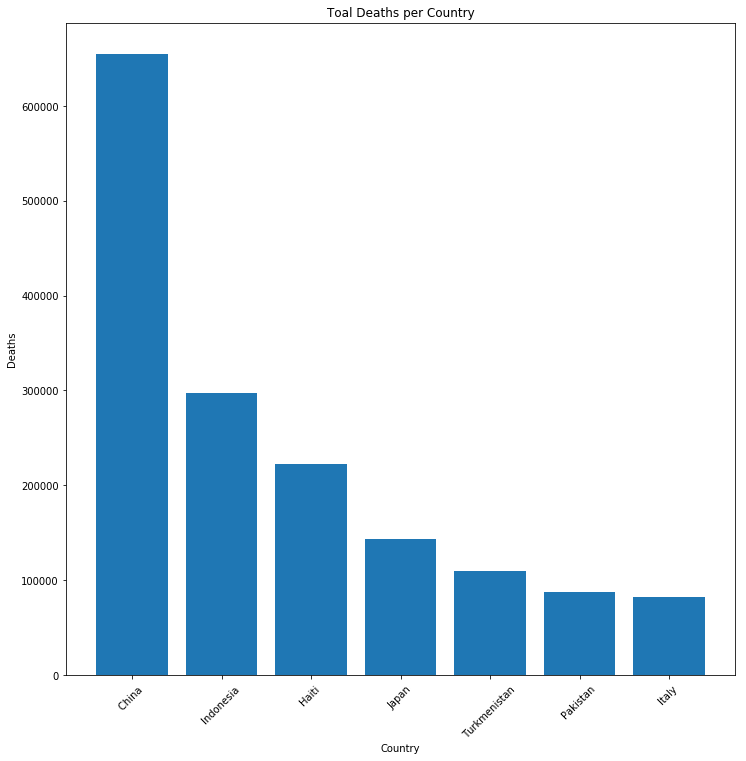

In [209]:
plt.figure(figsize=(12,12))
plt.bar(x='Country', height='Max', data = earthquakedf2)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Toal Deaths per Country')
plt.show()

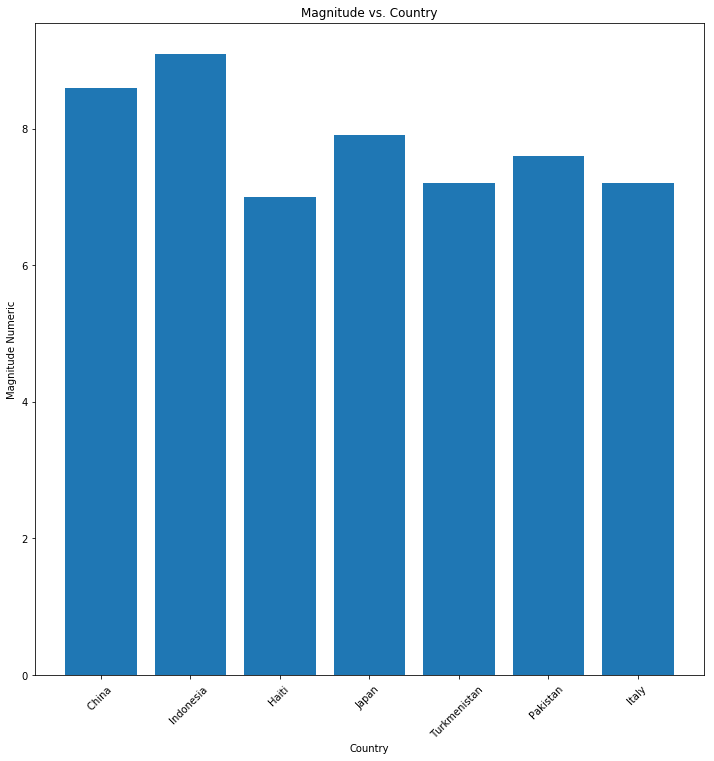

In [213]:
plt.figure(figsize=(12,12))
plt.bar(x='Country', height='Magnitude Numeric', data = earthquakedf2)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Magnitude Numeric')
plt.title('Magnitude vs. Country')
plt.show()

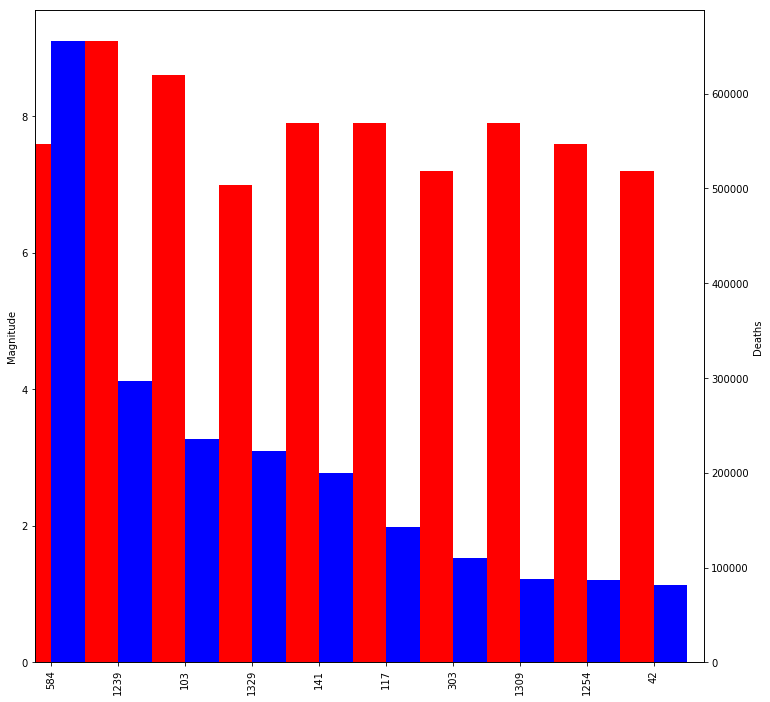

In [223]:
fig = plt.figure(figsize=(12,12)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

earthquakedf2['Magnitude Numeric'].plot(kind='bar', x= 'Country', color='red', ax=ax, position=1)
earthquakedf2['Max'].plot(kind='bar', x= 'Country', color='blue', ax=ax2, position=0)

ax.set_ylabel('Magnitude')
ax2.set_ylabel('Deaths')

plt.show()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import folium

In [150]:
def make_point(earthquakedf):
    return Point(earthquakedf.Long, earthquakedf.Lat)

# Go through every row, and make a point out of its lat and lon
points = earthquakedf.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
GeoEarthquakes = gpd.GeoDataFrame(earthquakedf, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
GeoEarthquakes.crs = {'init': 'epsg:4326'}

# Let's look at the first few
GeoEarthquakes.head()

#Source: http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max,latbin,lonbin,geometry
1,1900-05-11 17:23,Japan,38.7,141.1,5.0,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN,NaN,38.0,140.0,POINT (141.1 38.7)
2,1900-07-12 06:25,Turkey,40.3,43.1,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0,140.0,40.0,42.0,POINT (43.1 40.3)
3,1900-10-29 09:11,Venezuela,11.0,-66.0,0.0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN,NaN,10.0,-66.0,POINT (-66 11)
4,1901-02-15 00:00,China,26.0,100.1,0.0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN,NaN,26.0,100.0,POINT (100.1 26)
5,1901-03-31 07:11,Bulgaria,43.4,28.7,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0,4.0,42.0,28.0,POINT (28.7 43.4)


(-197.99999999999997,
 198.00000000000014,
 -98.68225650000004,
 92.32738650000003)

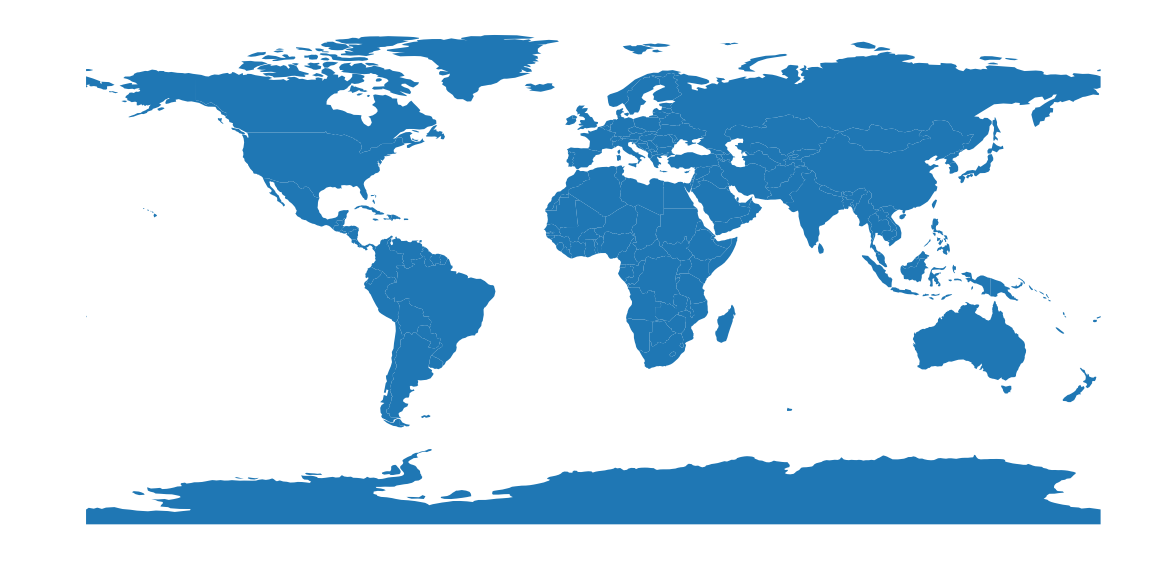

In [151]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,12))
ax.axis('off')

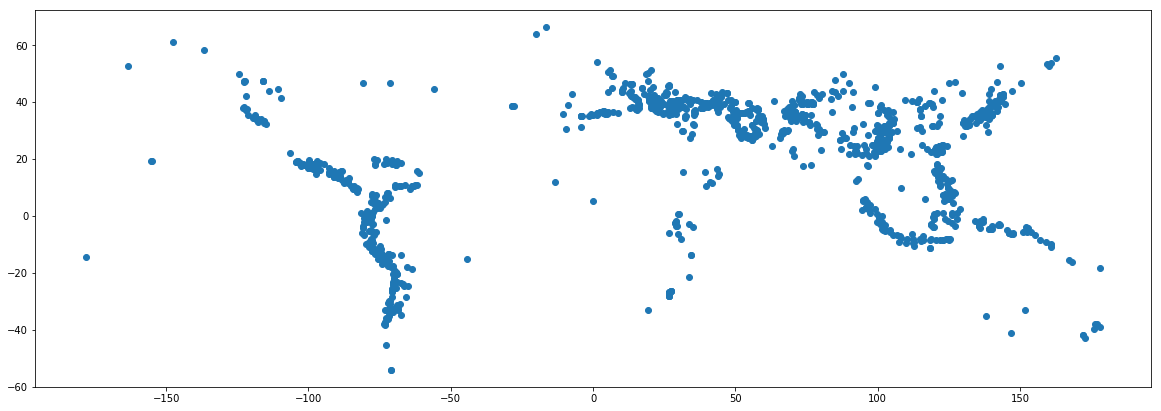

In [152]:
GeoEarthquakes.plot(figsize=(20,7))

(-197.99999999999994,
 198.00000000000014,
 -98.68225650000002,
 92.32738650000002)

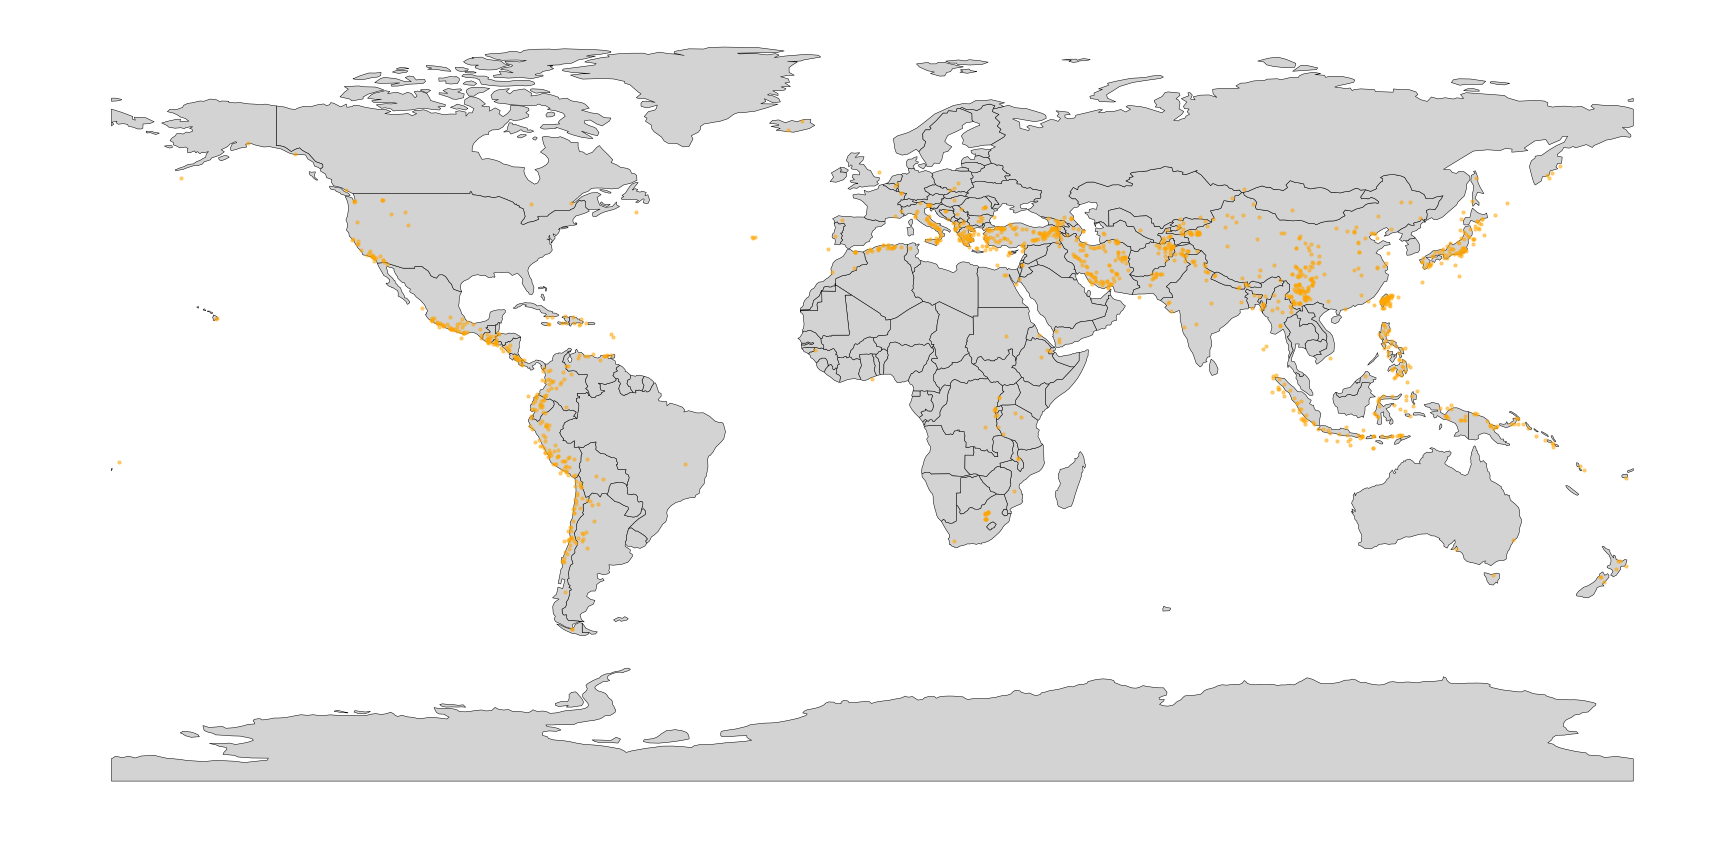

In [153]:
# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(30,30))
# Pass ax=ax to the second layer
GeoEarthquakes.plot(markersize=10, color='orange', alpha=0.5, ax=ax)
ax.axis('off')

# This map shows us that there are certain "hotspots" around the world where you would want to avoid living to eliminate the risk of experiencing an earthquake: The pacific coast of the western hemisphere (All the way from Alaska to Chile), Italy and the Mediterranean countries east of it, Japan, Southwest China, Indonesia, and the middle east outside of the Arabian Gulf. 

# However, that does not tell the whole story. You do not necessarily have a higher chance of death if you live in a earth-quake prone country. The wealth of a country--which is a determinant of factors like building codes--makes a huge difference. Let's look at the top 100 magnitude earthquakes and compare them to total deaths.

In [141]:
GeoEarthquakes.groupby(['Max']).size().sort_values(ascending=False)

Max
1.0       243
2.0       139
3.0        60
4.0        49
5.0        40
6.0        27
7.0        27
9.0        24
8.0        22
10.0       22
11.0       20
15.0       18
12.0       14
20.0       14
30.0       13
26.0       10
100.0       9
18.0        9
200.0       8
17.0        8
1000.0      8
13.0        8
24.0        7
500.0       7
16.0        7
35.0        7
60.0        7
50.0        7
22.0        7
29.0        6
         ... 
1409.0      1
1404.0      1
1314.0      1
1313.0      1
1305.0      1
1258.0      1
1251.0      1
1115.0      1
1086.0      1
1083.0      1
973.0       1
965.0       1
894.0       1
852.0       1
748.0       1
737.0       1
730.0       1
703.0       1
700.0       1
680.0       1
665.0       1
653.0       1
643.0       1
631.0       1
612.0       1
601.0       1
593.0       1
573.0       1
565.0       1
280.0       1
Length: 294, dtype: int64

In [140]:
GeoEarthquakes

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max,latbin,lonbin,geometry
1,1900-05-11 17:23,Japan,38.7000,141.1000,5.0,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN,NaN,38.0,140.0,POINT (141.1 38.7)
2,1900-07-12 06:25,Turkey,40.3000,43.1000,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0,140.0,40.0,42.0,POINT (43.1 40.3)
3,1900-10-29 09:11,Venezuela,11.0000,-66.0000,0.0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN,NaN,10.0,-66.0,POINT (-66 11)
4,1901-02-15 00:00,China,26.0000,100.1000,0.0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN,NaN,26.0,100.0,POINT (100.1 26)
5,1901-03-31 07:11,Bulgaria,43.4000,28.7000,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0,4.0,42.0,28.0,POINT (28.7 43.4)
6,1901-08-09 09:23,Japan,40.5000,142.5000,35.0,7.2 Mw,T,NaN,7.2,Mw,NaN,NaN,NaN,NaN,NaN,40.0,142.0,POINT (142.5 40.5)
7,1901-11-15 20:15,New Zealand,-43.0000,173.0000,0.0,6.8 Ms,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0,1.0,-44.0,172.0,POINT (173 -43)
8,1902-01-30 14:01,Japan,40.5000,141.3000,35.0,6.9 Ms,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0,1.0,40.0,140.0,POINT (141.3 40.5)
9,1902-02-13 09:39,Azerbaijan,40.7000,48.6000,15.0,6.9 Muk,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0,86.0,40.0,48.0,POINT (48.6 40.7)
10,1902-03-09 07:46,Turkey,40.7000,33.6000,NaN,5.5 Muk,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0,4.0,40.0,32.0,POINT (33.6 40.7)


In [145]:
GeoEarthquakes['Max'].nlargest(n=10)

584     655237.0
1239    297200.0
103     235502.0
1329    222517.0
141     200000.0
117     143000.0
303     110000.0
1309     88287.0
1254     87351.0
42       82000.0
Name: Max, dtype: float64

In [146]:
GeoEarthquakes['Magnitude Numeric'].nlargest(n=10)

397     9.5
417     9.2
1239    9.1
333     9.0
1336    9.0
30      8.8
1330    8.8
110     8.7
103     8.6
319     8.6
Name: Magnitude Numeric, dtype: float64

# Let's subset the dataframe to just look at the top 100 earthquakes in terms of magnitude.

In [166]:
GeoEarthquakes_subset=GeoEarthquakes.nlargest(100, "Magnitude Numeric")

In [168]:
GeoEarthquakes_subset

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max,latbin,lonbin,geometry
397,1960-05-22 19:11,Chile,-38.235,-73.047,35.0,9.5 Muk,T,NaN,9.5,Muk,NaN,6000.0,NaN,5700.0,6000.0,-40.0,-74.0,POINT (-73.047 -38.235)
417,1964-03-28 03:36,United States,61.017,-147.648,6.6,9.2 Muk,T,NaN,9.2,Muk,NaN,131.0,NaN,131.0,131.0,60.0,-148.0,POINT (-147.648 61.017)
1239,2004-12-26 00:58,Indonesia,3.287,95.972,30.0,9.1 Mw,"T,L",NaN,9.1,Mw,247299.333333,NaN,297200.0,NaN,297200.0,2.0,94.0,POINT (95.97200000000001 3.287)
333,1952-11-04 16:58,Russian Federation,52.755,160.057,22.2,9.0 Muk,T,NaN,9.0,Muk,NaN,NaN,NaN,NaN,NaN,52.0,160.0,POINT (160.057 52.755)
1336,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0 Mw,T,NaN,9.0,Mw,15894.000000,NaN,NaN,NaN,15894.0,38.0,142.0,POINT (142.369 38.322)
30,1906-01-31 15:36,Ecuador,1.000,-81.500,0.0,8.8 Muk,T,NaN,8.8,Muk,NaN,400.0,NaN,1000.0,1000.0,0.0,-82.0,POINT (-81.5 1)
1330,2010-02-27 06:34,Chile,-35.846,-72.719,35.0,8.8 Mw [18],T,NaN,8.8,Mw [18],521.000000,NaN,NaN,NaN,521.0,-36.0,-74.0,POINT (-72.71899999999999 -35.846)
110,1922-11-11 04:32,Chile,-28.553,-70.755,35.0,8.7 Mw,T,NaN,8.7,Mw,NaN,1000.0,NaN,1000.0,1000.0,-30.0,-72.0,POINT (-70.755 -28.553)
103,1920-12-16 12:05,China,36.601,105.317,25.0,8.6 Ms,NaN,NaN,8.6,Ms,NaN,180000.0,NaN,235502.0,235502.0,36.0,104.0,POINT (105.317 36.601)
319,1950-08-15 14:09,China,28.500,96.500,0.0,8.6 Muk,L,NaN,8.6,Muk,NaN,1500.0,NaN,3300.0,3300.0,28.0,96.0,POINT (96.5 28.5)


Text(0.5,1,'Magnitude vs. Total Deaths')

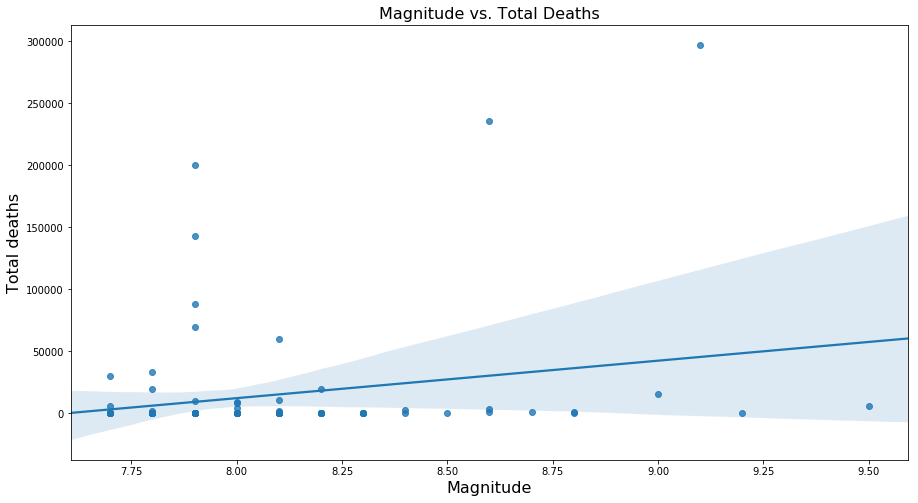

In [169]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Magnitude Numeric", y = "Max", data=GeoEarthquakes_subset)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Magnitude vs. Total Deaths", fontsize=16)

In [170]:
GeoEarthquakes_subset['Max'].corr(GeoEarthquakes_subset['Magnitude Numeric'])

0.224679399097429

# 0.22 is a weak correlation between deaths and magnitude.

In [171]:
GeoEarthquakes['Max'].corr(GeoEarthquakes['Magnitude Numeric'])

0.13967890128546204

# The correation is even weaker if we consider all earthquakes: 0.14

# Now let's subset our data to look at the top 100 earthquakes in terms of total fatalities. 

In [172]:
GeoEarthquakes_subset2=GeoEarthquakes.nlargest(100, "Max")

In [178]:
GeoEarthquakes_subset2

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max,latbin,lonbin,geometry
584,1976-07-27 19:42,China,39.605,117.888,16.7,7.6 Mw,NaN,655237,7.6,Mw,NaN,242000.0,655237.0,242800.0,655237.0,38.0,116.0,POINT (117.888 39.605)
1239,2004-12-26 00:58,Indonesia,3.287,95.972,30.0,9.1 Mw,"T,L",NaN,9.1,Mw,247299.333333,NaN,297200.0,NaN,297200.0,2.0,94.0,POINT (95.97200000000001 3.287)
103,1920-12-16 12:05,China,36.601,105.317,25.0,8.6 Ms,NaN,NaN,8.6,Ms,NaN,180000.0,NaN,235502.0,235502.0,36.0,104.0,POINT (105.317 36.601)
1329,2010-01-12 17:00,Haiti,18.457,-72.533,13.0,7.0 Mw,NaN,NaN,7.0,Mw,222517.000000,NaN,NaN,NaN,222517.0,18.0,-74.0,POINT (-72.533 18.457)
141,1927-05-22 22:32,China,37.386,102.311,25.0,7.9 Ms,NaN,NaN,7.9,Ms,NaN,200000.0,NaN,80000.0,200000.0,36.0,102.0,POINT (102.311 37.386)
117,1923-09-01 02:58,Japan,35.405,139.084,35.0,7.9 Muk,"T,F",NaN,7.9,Muk,105000.000000,143000.0,NaN,142807.0,143000.0,34.0,138.0,POINT (139.084 35.405)
303,1948-10-05 20:12,Turkmenistan,37.500,58.000,0.0,7.2 Mw,NaN,NaN,7.2,Mw,NaN,110000.0,NaN,19800.0,110000.0,36.0,58.0,POINT (58 37.5)
1309,2008-05-12 06:28,China,31.002,103.322,19.0,7.9 Mw,L,69195,7.9,Mw,NaN,87476.0,88287.0,NaN,88287.0,30.0,102.0,POINT (103.322 31.002)
1254,2005-10-08 03:50,Pakistan,34.465,73.584,23.1,7.6 Mw,"L,Lq",87351,7.6,Mw,NaN,73338.0,87351.0,NaN,87351.0,34.0,72.0,POINT (73.584 34.465)
42,1908-12-28 04:20,Italy,38.000,15.500,0.0,7.2 Ms,T,NaN,7.2,Ms,NaN,75000.0,NaN,82000.0,82000.0,38.0,14.0,POINT (15.5 38)


Text(0.5,1,'Magnitude vs. Total Deaths')

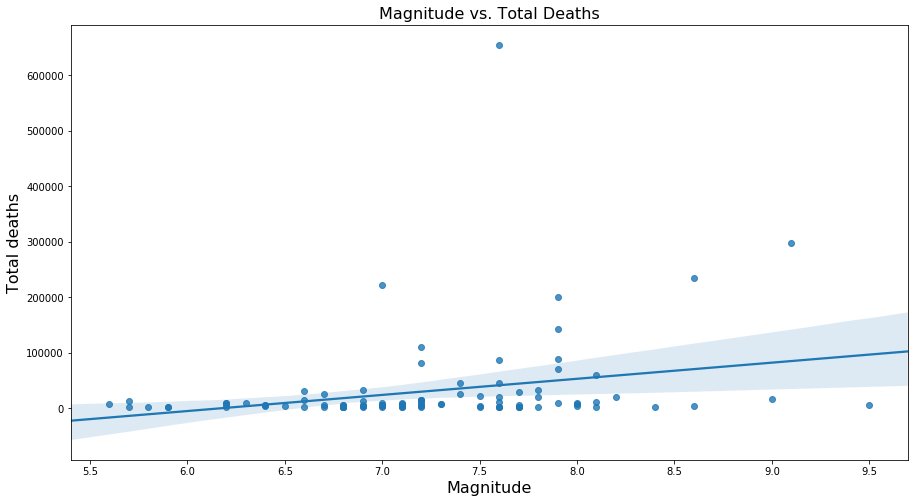

In [174]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Magnitude Numeric", y = "Max", data=GeoEarthquakes_subset2)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Magnitude vs. Total Deaths", fontsize=16)

In [176]:
GeoEarthquakes_subset2['Max'].corr(GeoEarthquakes_subset2['Magnitude Numeric'])

0.26215571691839323

# We are still seeing the same trend (a relateively weak correlation between magnitude and total deaths). 

# Let's just look at the top 100 deadliest earthquakes on a map. 

(-197.99999999999997,
 198.00000000000014,
 -98.68225650000004,
 92.32738650000003)

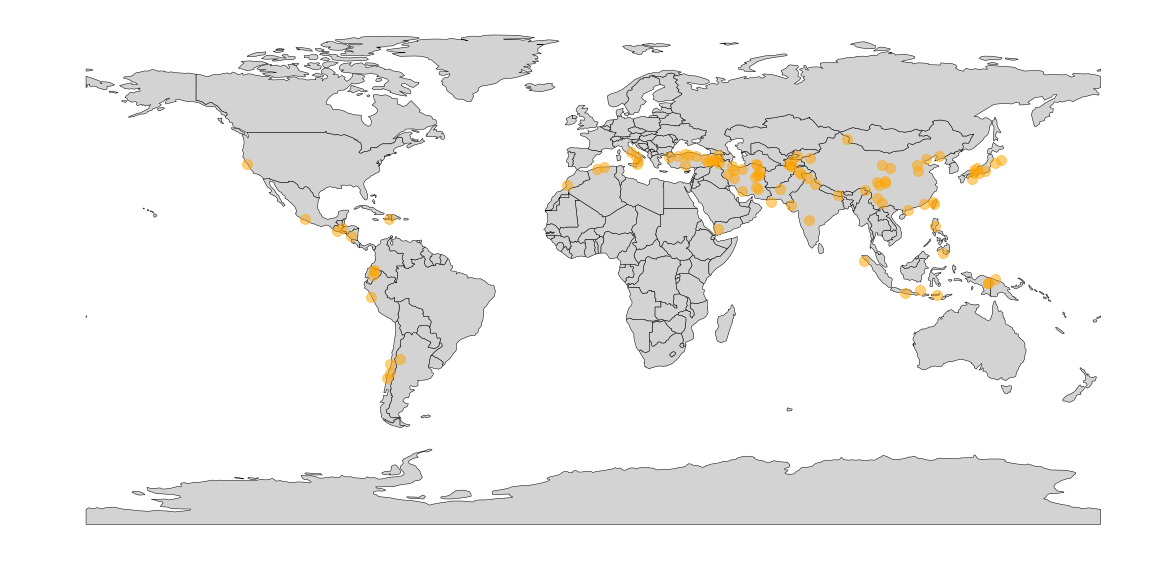

In [206]:
# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(20,20))
# Pass ax=ax to the second layer
GeoEarthquakes_subset2.plot(markersize=100, color='orange', alpha=0.5, ax=ax)
ax.axis('off')

# With the exception of a Italy and and Japan, the deadliest earthquakes occur in underdeveloped countries. 

In [133]:
# m = folium.Map(
#     location=[45.372, -121.6972],
#     zoom_start=0,
#     tiles='Stamen Terrain'
# )

# folium.Marker(
#     location=[45.3288, -121.6625],
#     popup='Mt. Hood Meadows',
#     icon=folium.Icon(icon='cloud')
# ).add_to(m)

# folium.Marker(
#     location=[45.3311, -121.7113],
#     popup='Timberline Lodge',
#     icon=folium.Icon(color='green')
# ).add_to(m)

# folium.Marker(
#     location=[45.3300, -121.6823],
#     popup='Some Other Location',
#     icon=folium.Icon(color='red', icon='info-sign')
# ).add_to(m)

In [ ]:
# map_hooray = folium.Map(location=[51.5074, 0.1278],
#                         tiles = "Stamen Toner",
#                         zoom_start = 12)
# # 'width=int' and 'height=int' can also be added to the map

# folium.Marker([51.5079, 0.0877], popup='London Bridge').add_to(map_hooray)
# map_hooray